### Review metrics from CSV loggers

In [519]:
import os.path as osp
import os
import pandas as pd


os.chdir('/Users/limingzhou/zhoul/work/energy/pytools')

from pytools.config import Config


Tensorboard review

tensorboard --logdir /Users/limingzhou/zhoul/work/energy/sites/albany-prod2/model/tensorboard_logger

In [526]:
# load all file names in the log folder. find the latest version.
#!ls ../pytools/pytools
config = Config('../pytools/pytools/config/albany_prod.toml')
log_folder = osp.join(config.site_parent_folder, 'model','csv_logger')

sub_dir = [x[0] for x in os.walk(log_folder)]

vers = [(f, int(f.split('/')[-1].split('_')[-1])) for f in sub_dir if f.split('/')[-1].startswith('version')]

fn, ver = zip(*vers)
max_ver = max(ver)
ind = ver.index(max_ver)
print(f'the latest version is {max_ver}')
fn_last = fn[ind]
table = pd.read_csv(osp.join(fn_last,'metrics.csv'))


the latest version is 20


In [527]:
table.tail(20)

,abs_bias,abs_bias_perc,abs_loss(MAE),epoch,relative_loss(RMAE),step,test RMSE loss,training RMSE loss_epoch,training RMSE loss_step,val RMSE loss,y_mean,y_std
3976,NaN,NaN,NaN,248,NaN,174049,NaN,NaN,0.011557,NaN,NaN,NaN
3977,NaN,NaN,NaN,248,NaN,174050,NaN,NaN,NaN,0.029735,NaN,NaN
3978,NaN,NaN,NaN,248,NaN,174050,NaN,0.013717,NaN,NaN,NaN,NaN
3979,NaN,NaN,NaN,249,NaN,174099,NaN,NaN,0.009541,NaN,NaN,NaN
3980,NaN,NaN,NaN,249,NaN,174149,NaN,NaN,0.020241,NaN,NaN,NaN
3981,NaN,NaN,NaN,249,NaN,174199,NaN,NaN,0.009543,NaN,NaN,NaN
3982,NaN,NaN,NaN,249,NaN,174249,NaN,NaN,0.011487,NaN,NaN,NaN
3983,NaN,NaN,NaN,249,NaN,174299,NaN,NaN,0.018370,NaN,NaN,NaN
3984,NaN,NaN,NaN,249,NaN,174349,NaN,NaN,0.022557,NaN,NaN,NaN
3985,NaN,NaN,NaN,249,NaN,174399,NaN,NaN,0.016725,NaN,NaN,NaN


### Review NYISO metrics

In [199]:
import os
os.chdir('/Users/limingzhou/zhoul/work/energy/pytools')


import numpy as np

from pytools.config import Config
from pytools.weather_task import load_training_data
from pytools.modeling.dataset import check_fix_missings

config = Config('pytools/config/albany_prod.toml')
load_data, w_paras, w_timestamp, w_data = load_training_data(config=config, yrs='2018-2019') 
p_list = [ a[1] for a in list(w_paras.item().items()) ]
plist=[]
for p in p_list:
    plist+=p
p_adopted = [plist[i] for i in config.model_pdt.weather_para_to_adopt]    
w_data=w_data[...,config.model_pdt.weather_para_to_adopt]

load_arr, wea_arr, t = check_fix_missings(load_arr=load_data, w_timestamp=w_timestamp, w_arr=w_data)
# import matplotlib.pyplot as plt
# plt.scatter(load_arr[:,0],wea_arr[:,11,11,0])
# #plt.show()
# plt.savefig('test.png')
# return




/Users/limingzhou/zhoul/work/energy/pytools/pytools/modeling/dataset.py:253: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df_tl = t.set_index(t_str).join(df_load, how='left')
/Users/limingzhou/zhoul/work/energy/pytools/pytools/modeling/dataset.py:255: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_tl.fillna(method='ffill', inplace=True)
/Users/limingzhou/zhoul/work/energy/pytools/pytools/modeling/dataset.py:255: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_

KeyboardInterrupt: 

In [191]:
wea_arr = wea_arr.astype(np.float32)
load_arr = load_arr.astype(np.float32)

In [192]:
#t[0:24]

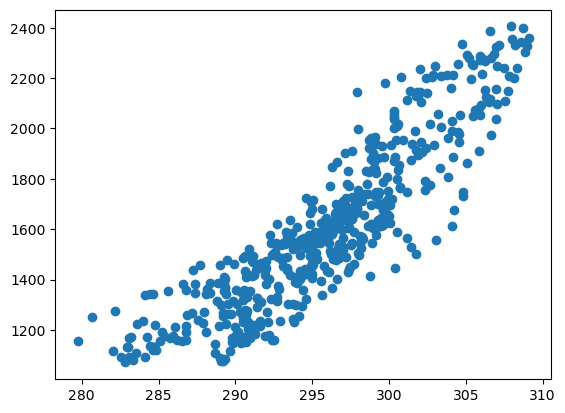

In [193]:
import matplotlib.pyplot as plt
plt.scatter(wea_arr[4000:4500,11,11,0],load_arr[4000:4500,0])
#plt.plot(wea_arr[0:72,0,0,0])

In [194]:
import pandas as pd
import numpy as np
t0=pd.Timestamp('2020-1-3 13:00')
t1 = pd.Timestamp('2020-1-5 13:00')
dt = t1-t0
dt/np.timedelta64(1,'h')

48.0